In [2]:
#import libraries and functions to load the data
from matplotlib import pyplot as plt

import os
import time

import numpy as np
import torch
import torch.nn.functional as F

In [3]:
#for nvidia 
has_gpu = torch.cuda.is_available()
#for mac
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "cuda" if torch.cuda.is_available() else "cpu"

print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

## Some Hyperparameters 
random_seed = 1
batch_size = 128
learning_rate = 0.01
num_epochs = 40
num_classes = 12

GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


/var/folders/18/jb6sg5tn0wd0md220_4vpttw0000gn/T/ipykernel_2050/3840129315.py:4: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  has_mps = getattr(torch,'has_mps',False)
/var/folders/18/jb6sg5tn0wd0md220_4vpttw0000gn/T/ipykernel_2050/3840129315.py:5: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = "mps" if getattr(torch,'has_mps',False) \


In [4]:
from torchvision import transforms, datasets
from torch.utils.data.dataset import random_split
from torchvision.datasets import ImageFolder

train_data_transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((32, 32)),  
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)
test_data_transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((32, 32)),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]
)

In [5]:
import torchvision.transforms as transforms
from torch.utils.data.dataset import random_split
from torchvision.datasets import FashionMNIST
import torchvision
import torch
from torch.utils.data import DataLoader, Dataset, random_split


dataset = torchvision.datasets.ImageFolder(root='kanji_dataset', transform=train_data_transform)

train_size = int(0.8 * len(dataset))  
test_size = len(dataset) - train_size  
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_size = int(0.9 * len(train_dataset))  
valid_size = len(train_dataset) - train_size  

train_dataset, valid_dataset = random_split(train_dataset, [train_size, valid_size])


In [6]:
from torch.utils.data import DataLoader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    drop_last=True,
    num_workers=3,
    shuffle=True
)
valid_loader = DataLoader(
    dataset=valid_dataset,
    batch_size=batch_size,
    drop_last=False,
    num_workers=3,
    shuffle=False
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    drop_last=False,
    num_workers=3,
    shuffle=False
)

Mini_batch Dimensions: [B, C, H, W] = 
torch.Size([128, 1, 32, 32])


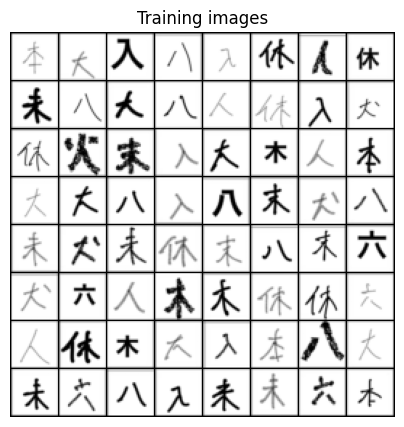

Labels = 
[[ 5  0  2  1  2 11  4 11]
 [ 8  1  0  1  4 11  2  6]
 [11  3 10  2  0  7  4  5]
 [ 0  0  1  2  1 10  6  1]
 [ 8  6  8 11 10  1 10  9]
 [ 6  9  4  7  7 11 11  9]
 [ 4 11  7  0  2  5  1  0]
 [ 8  9  1  2  8  8  9  5]]


In [7]:
import torchvision.utils as vutils

%matplotlib inline
import matplotlib.pyplot as plt

im_batch = next(iter(train_loader))
print('Mini_batch Dimensions: [B, C, H, W] = ')
print(im_batch[0].shape)
plt.figure(figsize=(5, 5))
plt.title("Training images")
plt.axis("off")
plt.imshow(
    np.transpose(
        vutils.make_grid(im_batch[0][:64], nrow=8, padding=1, normalize=True), (1, 2, 0)
    )
)
plt.show()
print("Labels = " )
print(im_batch[1][:64].data.numpy().reshape(8,-1))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 2.4849, Train Accuracy: 0.0938, Test Loss: 2.4857, Test Accuracy: 0.0714, Time: 64.75 sec
Epoch [2/10], Train Loss: 2.4845, Train Accuracy: 0.0840, Test Loss: 2.4876, Test Accuracy: 0.0617, Time: 62.53 sec
Epoch [3/10], Train Loss: 2.4839, Train Accuracy: 0.0928, Test Loss: 2.4882, Test Accuracy: 0.0552, Time: 65.11 sec
Epoch [4/10], Train Loss: 2.4813, Train Accuracy: 0.0977, Test Loss: 2.4905, Test Accuracy: 0.0552, Time: 65.06 sec
Epoch [5/10], Train Loss: 2.4809, Train Accuracy: 0.0879, Test Loss: 2.4922, Test Accuracy: 0.0552, Time: 369.23 sec
Epoch [6/10], Train Loss: 2.4790, Train Accuracy: 0.0957, Test Loss: 2.4942, Test Accuracy: 0.0552, Time: 417.94 sec
Epoch [7/10], Train Loss: 2.4788, Train Accuracy: 0.0918, Test Loss: 2.4941, Test Accuracy: 0.0552, Time: 64.37 sec
Epoch [8/10], Train Loss: 2.4743, Train Accuracy: 0.0908, Test Loss: 2.4918, Test Accuracy: 0.0552, Time: 174.33 sec
Epoch [9/10], Train Loss: 2.4686, Train Accuracy: 0.0938, Test Loss: 

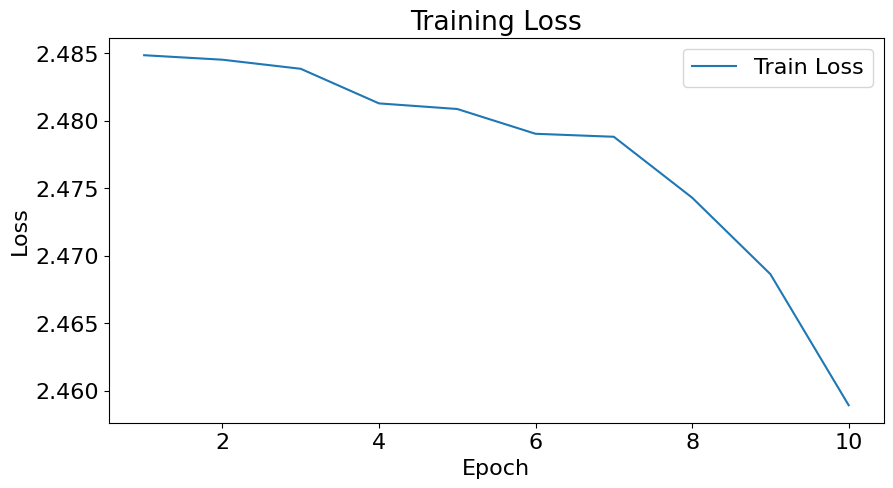

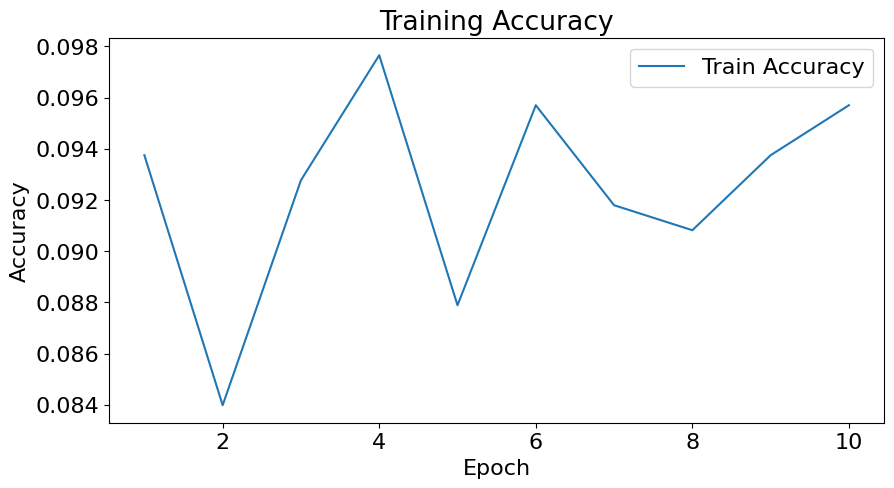

[2.484864503145218, 2.484532058238983, 2.483858972787857, 2.4812942147254944, 2.4808789789676666, 2.4790420830249786, 2.4788202047348022, 2.4743081629276276, 2.4686384797096252, 2.4589240849018097]
[0.09375, 0.083984375, 0.0927734375, 0.09765625, 0.087890625, 0.095703125, 0.091796875, 0.0908203125, 0.09375, 0.095703125]


In [16]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import time
import matplotlib.pyplot as plt

# Define function to train the model
def train_model(model, criterion, optimizer, train_loader, test_loader, device, num_epochs=25):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        start_time = time.time()  # Get start time
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_accuracy = correct / total
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Evaluate the model on test data
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_test_loss = test_loss / len(test_loader)
        epoch_test_accuracy = correct / total
        test_losses.append(epoch_test_loss)
        test_accuracies.append(epoch_test_accuracy)

        # Print and display progress
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {epoch_test_accuracy:.4f}, Time: {time.time() - start_time:.2f} sec')

    # Set font size
    plt.rcParams.update({'font.size': 16})
    # Plot the training loss and accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()
    
    print(train_losses)
    print(train_accuracies)

# Define your train_loader and test_loader here

# Obtain model
model = models.vgg16(pretrained=False)

# Change first convolutional layer
weights = model.features[0].weight.data
new_weights = weights[:, 0, :, :].unsqueeze(1)
model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
model.features[0].weight.data = new_weights

# Change last layer
num_classes = 12
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Define number of epochs
num_epochs =  10

# Train the model
train_model(model, criterion, optimizer, train_loader, test_loader, device, num_epochs)


In [14]:
print(train_losses)

NameError: name 'train_losses' is not defined

In [13]:
from sklearn.metrics import confusion_matrix

model = model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = model(imgs)
        preds = logits.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0 25]
 [ 0  0  0  0  0  0  0  0  0  0  0 25]
 [ 0  0  0  0  0  0  0  0  0  0  0 26]
 [ 0  0  0  0  0  0  0  0  0  0  0 23]
 [ 0  0  0  0  0  0  0  0  0  0  0 26]
 [ 0  0  0  0  0  0  0  0  0  0  0 22]
 [ 0  0  0  0  0  0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0  0  0  0  0  0 35]
 [ 0  0  0  0  0  0  0  0  0  0  0 24]
 [ 0  0  0  0  0  0  0  0  0  0  0 28]
 [ 0  0  0  0  0  0  0  0  0  0  0 23]
 [ 0  0  0  0  0  0  0  0  0  0  0 17]]
